Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



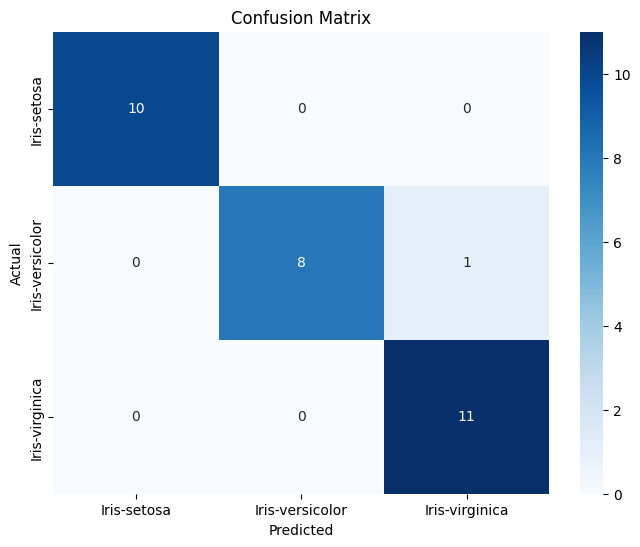

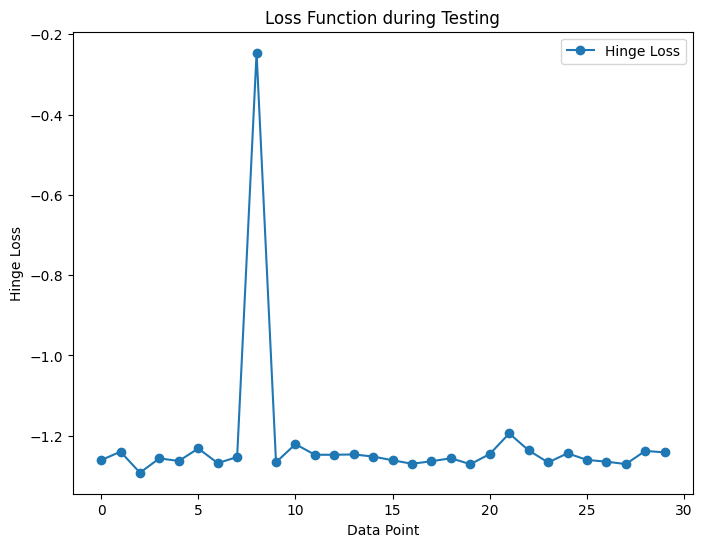

Predictions for new data points: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset
iris = pd.read_csv(r"C:\Users\admin\Downloads\BTL AI\Iris.csv")

# Assuming the column names are 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', and 'Species'
expected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Check if all expected columns are present
if all(column in iris.columns for column in expected_columns):
    X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
    y = iris['Species']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình SVM
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X_train, y_train)

    # Dự đoán trên tập kiểm thử
    predictions = svm.predict(X_test)

    # Đánh giá mô hình
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

    # Hiển thị ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Hiển thị báo cáo phân loại
    class_report = classification_report(y_test, predictions)
    print("Classification Report:")
    print(class_report)

    # Vẽ biểu đồ Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Đánh giá loss function
    decision_values = svm.decision_function(X_test)

    # Convert class labels to integers
    label_mapping = {label: i for i, label in enumerate(iris['Species'].unique())}
    y_test_int = np.array([label_mapping[label] for label in y_test])

    correct_class_decision_values = decision_values[np.arange(len(decision_values)), y_test_int]
    hinge_loss = np.mean(np.maximum(0, 1 - correct_class_decision_values))

    # Biểu đồ loss function qua các bước huấn luyện
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(correct_class_decision_values)), 1 - correct_class_decision_values, label='Hinge Loss', marker='o')
    plt.title('Loss Function during Testing')
    plt.xlabel('Data Point')
    plt.ylabel('Hinge Loss')
    plt.legend()
    plt.show()

    # Test with new data points
    new_data = np.array([
        [5.0, 3.0, 1.5, 0.2],
        [6.0, 3.5, 4.0, 1.3],
        [7.5, 2.5, 6.0, 2.0]
    ])

    # Scale the new data points using the same scaler
    new_data_scaled = scaler.transform(new_data)

    # Predict the class of the new data points
    new_predictions = svm.predict(new_data_scaled)
    print("Predictions for new data points:", new_predictions)

else:
    print("Column names in the DataFrame do not match the expected columns.")
    print("Expected columns:", expected_columns)
    print("Actual columns:", iris.columns)
